In [1]:
from PIL import Image
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt

data_X_cat = []
data_X_dog = []
test = []
for i in range(0, 12500):
    file_name_cat = 'train/cat.%d.jpg'%(i)
    file_name_dog = 'train/dog.%d.jpg'%(i)
    I_cat = Image.open(file_name_cat)
    I_dog = Image.open(file_name_dog)
    I_cat = np.array(I_cat)
    I_dog = np.array(I_dog)
    L_cat = skimage.transform.resize(I_cat,(150, 150))
    L_dog = skimage.transform.resize(I_dog,(150, 150))
    data_X_cat.append(L_cat)
    data_X_dog.append(L_dog)
for item in range(1, 12501):
    file_name = 'test1/%d.jpg'%(item)
    I = Image.open(file_name)
    I = np.array(I)
    L = skimage.transform.resize(I,(150, 150))
    test.append(L)
data_X_cat = np.array(data_X_cat)
data_X_dog = np.array(data_X_dog)
test = np.array(test)
label_cat = np.array([0]*12500)
label_dog = np.array([1]*12500)

In [2]:
train_X = np.concatenate((data_X_cat,data_X_dog),axis=0)
label = np.concatenate((label_cat,label_dog),axis=0)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_X, label, test_size = 0.3)

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train,
          epochs = 50, batch_size = 512)

Epoch 1/50
35/35 [==============================] - 26s 734ms/step - loss: 0.6902 - accuracy: 0.5502
Epoch 2/50
35/35 [==============================] - 18s 518ms/step - loss: 0.6572 - accuracy: 0.6214
Epoch 3/50
35/35 [==============================] - 17s 482ms/step - loss: 0.6375 - accuracy: 0.6495
Epoch 4/50
35/35 [==============================] - 13s 374ms/step - loss: 0.6120 - accuracy: 0.6759
Epoch 5/50
35/35 [==============================] - 14s 388ms/step - loss: 0.5965 - accuracy: 0.6853
Epoch 6/50
35/35 [==============================] - 13s 386ms/step - loss: 0.5794 - accuracy: 0.7025
Epoch 7/50
35/35 [==============================] - 13s 374ms/step - loss: 0.5652 - accuracy: 0.7094
Epoch 8/50
35/35 [==============================] - 13s 378ms/step - loss: 0.5503 - accuracy: 0.7236
Epoch 9/50
35/35 [==============================] - 13s 368ms/step - loss: 0.5366 - accuracy: 0.7340
Epoch 10/50
35/35 [==============================] - 13s 370ms/step - loss: 0.5276 - accura

In [13]:
val_result = model.predict(x_val)
score = 1
for i in range(0,len(val_result)):
    if val_result[i] >= 0.5:
        val_result[i] = 1  
    if val_result[i] < 0.5:
        val_result[i] = 0
    score -= (1/len(x_val)) * abs(float(val_result[i] - y_val[i]))

score

0.7764000000000246

7500

In [7]:
result = model.predict(test)
title = []
for i in range(0,len(test)):
    if result[i] >= 0.5:
        result[i] = 1
        title.append('dog')
    if result[i] < 0.5:
        result[i] = 0
        title.append('cat')


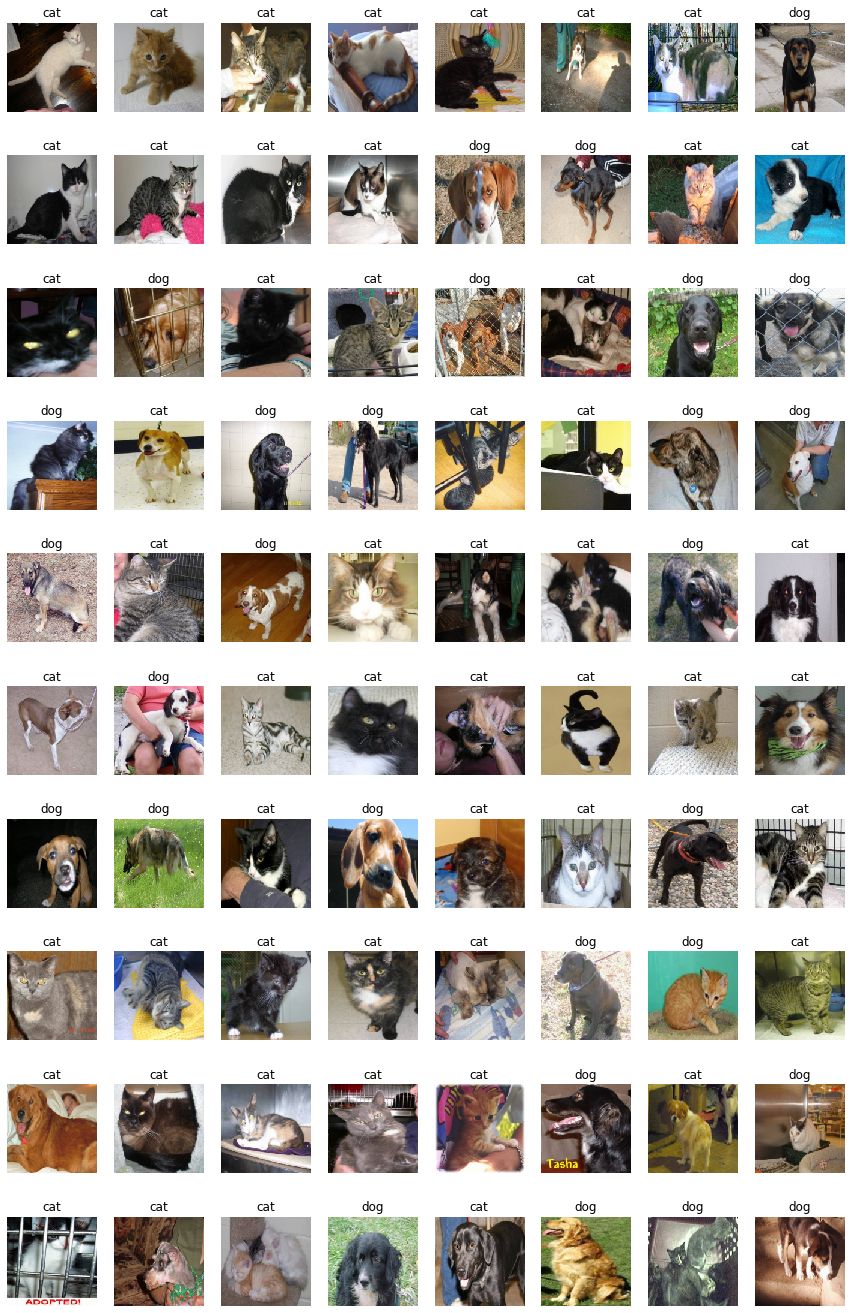

In [8]:
cols = 8
rows = 10
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test[random_index,:,:,:])
        ax.set_title(title[random_index])
plt.show()

In [9]:
import csv

id = np.array(range(1,12501))
label_r = []
for i in result:
    label_r.append(int(i))
with open("score.csv","w") as csvfile: 
    writer = csv.writer(csvfile)

    writer.writerow(["id","label"])
    for i in range(0,len(id)):
        writer.writerow([id[i], label_r[i]])